**DDOS Attack Detection**
**In this project we are using different models and classification techniques to detect DDOS Attacks and comparing the accuracy of these models.**
**We also implement a hybrid model which is then compared with the remaining models.**
**Datatset Link: https://cloudstor.aarnet.edu.au/plus/s/umT99TnxvbpkkoE**
**We take a sample of the dataset and train and test the model using the sample. As we can see the results are not much different, this is because the number of attack label are very less compared to normal/non-attack. If we take a well distributed dataset or sample, then the results will be significant.**

Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
training_path = "/content/drive/MyDrive/IT352 Dataset/UNSW_2018_IoT_Botnet_Final_10_best_Training.csv"
testing_path = "/content/drive/MyDrive/IT352 Dataset/UNSW_2018_IoT_Botnet_Final_10_best_Testing.csv"

df = pd.read_csv(training_path)
test = pd.read_csv(testing_path)

In [4]:
df

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,3142762,udp,192.168.100.150,6551,192.168.100.3,80,251984,1.900363,100,0.000000,4,2.687519,100,0.000000,0.494549,4.031619,1,DDoS,UDP
1,2432264,tcp,192.168.100.150,5532,192.168.100.3,80,256724,0.078003,38,3.856930,3,3.934927,100,0.000000,0.256493,4.012924,1,DDoS,TCP
2,1976315,tcp,192.168.100.147,27165,192.168.100.3,80,62921,0.268666,100,2.974100,3,3.341429,100,0.000000,0.294880,3.609205,1,DDoS,TCP
3,1240757,udp,192.168.100.150,48719,192.168.100.3,80,99168,1.823185,63,0.000000,4,3.222832,63,0.000000,0.461435,4.942302,1,DoS,UDP
4,3257991,udp,192.168.100.147,22461,192.168.100.3,80,105063,0.822418,100,2.979995,4,3.983222,100,0.000000,1.002999,4.994452,1,DDoS,UDP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2934812,1132803,udp,192.168.100.149,56044,192.168.100.5,80,253370,0.016992,100,4.082509,4,4.102515,100,0.000000,0.243473,4.124047,1,DoS,UDP
2934813,3384621,udp,192.168.100.150,21546,192.168.100.3,80,231693,1.922317,100,0.000000,4,2.718527,100,0.000000,0.490800,4.090534,1,DDoS,UDP
2934814,775893,udp,192.168.100.149,30897,192.168.100.5,80,158616,2.112228,100,0.000000,4,2.110766,100,0.000000,0.207444,4.332615,1,DoS,UDP
2934815,443484,tcp,192.168.100.147,36904,192.168.100.7,80,179855,0.000000,100,0.000000,3,0.000000,100,0.000000,0.162130,0.000000,1,DoS,TCP


In [5]:
attack_counts = df['attack'].value_counts()
print(attack_counts)

1    2934447
0        370
Name: attack, dtype: int64


In [6]:
# Assuming your dataframe is called df
attack_0 = df[df['attack'] == 0]
attack_1 = df[df['attack'] == 1].head(19630)

# Concatenate the two dataframes
df = pd.concat([attack_0, attack_1])

# Verify the resulting dataframe
print(df['attack'].value_counts())

1    19630
0      370
Name: attack, dtype: int64


In [7]:
test.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,792371,udp,192.168.100.150,48516,192.168.100.3,80,175094,0.226784,100,4.100436,4,4.457383,100,0.000000,0.404711,4.719438,1,DoS,UDP
1,2056418,tcp,192.168.100.148,22267,192.168.100.3,80,143024,0.451998,100,3.439257,1,3.806172,100,0.225077,0.401397,4.442930,1,DDoS,TCP
2,2795650,udp,192.168.100.149,28629,192.168.100.3,80,167033,1.931553,73,0.000000,4,2.731204,100,0.000000,0.407287,4.138455,1,DDoS,UDP
3,2118009,tcp,192.168.100.148,42142,192.168.100.3,80,204615,0.428798,56,3.271411,1,3.626428,100,0.000000,0.343654,4.229700,1,DDoS,TCP
4,303688,tcp,192.168.100.149,1645,192.168.100.5,80,40058,2.058381,100,0.000000,3,1.188407,100,0.000000,0.135842,4.753628,1,DoS,TCP


In [8]:
attacks = test['attack'].value_counts()
print(attacks)

1    733598
0       107
Name: attack, dtype: int64


In [9]:
attack_0 = test[test['attack'] == 0]
attack_1 = test[test['attack'] == 1].head(3893)

test = pd.concat([attack_0, attack_1])

# Verify the resulting dataframe
print(test['attack'].value_counts())

1    3893
0     107
Name: attack, dtype: int64


In [10]:
df.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
3377,3576923,tcp,192.168.100.5,0,192.168.100.3,0,7,0.235357,7,0.598172,2,4.898582,7,0.000000,10.932437,4.999866,0,Normal,Normal
7683,3577233,udp,192.168.100.150,46295,192.168.217.2,53,17475,0.000000,11,0.000000,4,0.000000,20,0.000000,0.400001,0.000000,0,Normal,Normal
8844,3576925,tcp,192.168.100.3,80,192.168.100.55,8080,1,0.228494,20,0.768694,2,4.947914,2,17.633553,17.634146,4.999863,0,Normal,Normal
10110,3577135,udp,192.168.100.147,38275,192.168.217.2,53,23527,0.000000,18,0.000000,4,0.000000,18,0.000000,0.399866,0.000000,0,Normal,Normal
16479,3576909,udp,192.168.100.150,56155,255.255.255.255,3289,4081,0.000000,14,0.000000,4,0.000000,2,0.000000,0.000000,0.000000,0,Normal,Normal


In [11]:
test.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
3128,3577323,udp,192.168.100.3,33597,205.251.193.205,53,3731,0.0,74,0.325693,2,0.325693,2,0.0,0.000000,0.325693,0,Normal,Normal
4598,3577316,udp,192.168.100.3,30179,199.19.57.1,53,3724,0.0,74,0.214945,2,0.214945,4,0.0,0.000000,0.214945,0,Normal,Normal
8786,3577244,udp,192.168.100.150,50302,8.8.8.8,53,22265,0.0,11,0.007445,2,0.007445,15,0.0,0.000000,0.007445,0,Normal,Normal
11808,3577341,udp,192.168.100.3,45138,156.154.101.3,53,3771,0.0,74,0.011710,2,0.011710,2,0.0,0.000000,0.011710,0,Normal,Normal
22770,3577242,udp,192.168.100.148,47494,192.168.217.2,53,22258,0.0,20,0.000000,4,0.000000,20,0.0,0.399963,0.000000,0,Normal,Normal


In [12]:
df = df.drop('category', axis=1)
df = df.drop('subcategory', axis=1)

test = test.drop('category', axis=1)
test = test.drop('subcategory', axis=1)

Label Encoding

In [13]:
#Label Encoding on proto column
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the column of interest
df['proto'] = le.fit_transform(df['proto'])
test['proto'] = le.fit_transform(test['proto'])

In [14]:
#Label Encoding on columns
df['daddr'] = le.fit_transform(df['daddr'])
test['daddr'] = le.fit_transform(test['daddr'])

df['saddr'] = le.fit_transform(df['saddr'])
test['saddr'] = le.fit_transform(test['saddr'])

df['sport'] = le.fit_transform(df['sport'])
test['sport'] = le.fit_transform(test['sport'])

df['dport'] = le.fit_transform(df['dport'])
test['dport'] = le.fit_transform(test['dport'])

In [15]:
df.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack
3377,3576923,3,9,1,15,1,7,0.235357,7,0.598172,2,4.898582,7,0.000000,10.932437,4.999866,0
7683,3577233,4,4,10371,21,296,17475,0.000000,11,0.000000,4,0.000000,20,0.000000,0.400001,0.000000,0
8844,3576925,3,6,16394,18,371,1,0.228494,20,0.768694,2,4.947914,2,17.633553,17.634146,4.999863,0
10110,3577135,4,1,8061,21,296,23527,0.000000,18,0.000000,4,0.000000,18,0.000000,0.399866,0.000000,0
16479,3576909,4,4,13255,69,215,4081,0.000000,14,0.000000,4,0.000000,2,0.000000,0.000000,0.000000,0


In [16]:
test.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack
3128,3577323,4,6,1452,30,77,3731,0.0,74,0.325693,2,0.325693,2,0.0,0.000000,0.325693,0
4598,3577316,4,6,1256,26,77,3724,0.0,74,0.214945,2,0.214945,4,0.0,0.000000,0.214945,0
8786,3577244,4,4,2573,39,77,22265,0.0,11,0.007445,2,0.007445,15,0.0,0.000000,0.007445,0
11808,3577341,4,6,2274,3,77,3771,0.0,74,0.011710,2,0.011710,2,0.0,0.000000,0.011710,0
22770,3577242,4,2,2405,16,77,22258,0.0,20,0.000000,4,0.000000,20,0.0,0.399963,0.000000,0


In [17]:
print(df.dtypes)

pkSeqID                int64
proto                  int64
saddr                  int64
sport                  int64
daddr                  int64
dport                  int64
seq                    int64
stddev               float64
N_IN_Conn_P_SrcIP      int64
min                  float64
state_number           int64
mean                 float64
N_IN_Conn_P_DstIP      int64
drate                float64
srate                float64
max                  float64
attack                 int64
dtype: object


In [18]:
print(test.dtypes)

pkSeqID                int64
proto                  int64
saddr                  int64
sport                  int64
daddr                  int64
dport                  int64
seq                    int64
stddev               float64
N_IN_Conn_P_SrcIP      int64
min                  float64
state_number           int64
mean                 float64
N_IN_Conn_P_DstIP      int64
drate                float64
srate                float64
max                  float64
attack                 int64
dtype: object


In [19]:
X_train = df.drop('attack', axis=1)
Y_train = df['attack']

In [20]:
X_test = test.drop('attack', axis=1)
Y_test = test['attack']

In [21]:
X_train

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max
3377,3576923,3,9,1,15,1,7,0.235357,7,0.598172,2,4.898582,7,0.000000,10.932437,4.999866
7683,3577233,4,4,10371,21,296,17475,0.000000,11,0.000000,4,0.000000,20,0.000000,0.400001,0.000000
8844,3576925,3,6,16394,18,371,1,0.228494,20,0.768694,2,4.947914,2,17.633553,17.634146,4.999863
10110,3577135,4,1,8061,21,296,23527,0.000000,18,0.000000,4,0.000000,18,0.000000,0.399866,0.000000
16479,3576909,4,4,13255,69,215,4081,0.000000,14,0.000000,4,0.000000,2,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19630,1541817,4,2,16300,19,364,138074,1.742527,100,0.000000,4,3.017924,100,0.000000,0.247997,4.042896
19631,1339939,4,3,200,17,364,198350,1.776333,60,0.000000,4,2.148978,60,0.000000,0.230464,4.086998
19632,3271426,4,1,5779,15,364,118498,0.822133,100,2.982571,4,3.987813,100,0.000000,1.002778,4.996367
19633,3281149,4,1,7254,15,364,128221,0.820528,100,2.985030,4,3.989675,100,0.000000,0.930721,4.994903


In [22]:
X_test

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max
3128,3577323,4,6,1452,30,77,3731,0.000000,74,0.325693,2,0.325693,2,0.0,0.000000,0.325693
4598,3577316,4,6,1256,26,77,3724,0.000000,74,0.214945,2,0.214945,4,0.0,0.000000,0.214945
8786,3577244,4,4,2573,39,77,22265,0.000000,11,0.007445,2,0.007445,15,0.0,0.000000,0.007445
11808,3577341,4,6,2274,3,77,3771,0.000000,74,0.011710,2,0.011710,2,0.0,0.000000,0.011710
22770,3577242,4,2,2405,16,77,22258,0.000000,20,0.000000,4,0.000000,20,0.0,0.399963,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3889,836971,4,3,2238,13,98,219694,2.111502,100,0.000000,4,2.110683,100,0.0,0.218713,4.304568
3890,1721746,3,3,289,11,98,70505,0.132352,82,0.000000,1,0.132352,100,0.0,0.184575,0.264703
3891,2051904,3,1,2382,11,98,138510,1.698048,100,0.000000,3,2.401195,100,0.0,0.289412,3.629136
3892,313961,3,3,3595,13,98,50331,2.092702,45,0.000000,3,1.208222,45,0.0,0.131967,4.832889


In [23]:
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)
y_train = np.array(Y_train)
y_test = np.array(Y_test)

**SVM From Scratch**

In [49]:
class SVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iters=100):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    def train(self, X, y):
        n_samples, n_features = X.shape
        
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        y_ = np.where(y <= 0, -1, 1)
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.weights) - self.bias) >= 1
                if condition:
                    self.weights -= self.lr * (2 * self.lambda_param * self.weights)
                else:
                    self.weights -= self.lr * (2 * self.lambda_param * self.weights - np.dot(x_i, y_[idx]))
                    self.bias -= self.lr * y_[idx]
    
    def test(self, X):
        approx = np.dot(X, self.weights) - self.bias
        return np.sign(approx)


In [25]:
modelSVM = SVM()
modelSVM.train(x_train, y_train)

y_predSVM = modelSVM.test(x_test)
accuracySVM = accuracy_score(y_predSVM, y_test)*100
print("Accuracy using SVM(%): ")
print(accuracySVM)

Accuracy using SVM(%): 
97.32499999999999


**Logistic Regression from Scratch**

In [26]:
import numpy as np

class LR:
    
    def __init__(self, learning_rate=0.01, num_iterations=100):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def train(self, X, y):
        n_samples, n_features = X.shape
        
        # initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # gradient descent
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)
            
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
        
    def test(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_cls

In [27]:
modelLR = LR()
modelLR.train(x_train, y_train)

y_predLR = modelLR.test(x_test)
accuracyLR = accuracy_score(y_predLR, y_test)*100
print("Accuracy using Logistic Regression(%): ")
print(accuracyLR)

Accuracy using Logistic Regression(%): 
97.35000000000001


**Naive Bayes from scratch**

In [28]:
class NaiveBayes:
    def train(self, X, y):
        self.classes = np.unique(y)
        self.mean = np.zeros((len(self.classes), X.shape[1]))
        self.var = np.zeros((len(self.classes), X.shape[1]))
        self.priors = np.zeros(len(self.classes))
        
        for idx, c in enumerate(self.classes):
            X_c = X[c == y]
            self.mean[idx, :] = X_c.mean(axis=0)
            self.var[idx, :] = X_c.var(axis=0)
            self.priors[idx] = X_c.shape[0] / float(X.shape[0])
    
    def test(self, X):
        y_pred = []
        for x in X:
            posterior = []
            for idx, c in enumerate(self.classes):
                prior = np.log(self.priors[idx])
                likelihood = np.sum(np.log(self.pdf(idx, x)))
                posterior.append(prior + likelihood)
            y_pred.append(self.classes[np.argmax(posterior)])
        return y_pred
    
    def pdf(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp(-((x-mean)**2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

In [29]:
modelNB = NaiveBayes()
modelNB.train(x_train, y_train)
y_predNB = modelNB.test(x_test)
accuracyNB = accuracy_score(y_predNB, y_test)*100
print("Accuracy using Naive Bayes(%): ")
print(accuracyNB)

Accuracy using Naive Bayes(%): 
99.97500000000001


<ipython-input-28-c3c7c848fc04>:20: RuntimeWarning: divide by zero encountered in log
  likelihood = np.sum(np.log(self.pdf(idx, x)))


**ANN**

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [31]:
# define the model architecture
model_ANN = keras.Sequential([
    layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# compile the model
model_ANN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
history_ANN = model_ANN.fit(x_train, y_train, epochs=1, batch_size=32, validation_data=(x_test, y_test))

# evaluate the model
score_ANN = model_ANN.evaluate(x_test, y_test)
print("Test accuracy:", score_ANN[1])

accuracyANN = score_ANN[1]*100

125/125 [==============================] - 0s 1ms/step - loss: 0.0278 - accuracy: 0.9910
Test accuracy: 0.9909999966621399


In [32]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [33]:
# reshape the input data for LSTM
n_timesteps = 1
n_features = X_train.shape[1]

x_train_LSTM = x_train.reshape((x_train.shape[0], n_timesteps, n_features))
x_test_LSTM = x_test.reshape((x_test.shape[0], n_timesteps, n_features))

# define the model architecture
model_LSTM = keras.Sequential([
    layers.LSTM(64, activation='relu', input_shape=(n_timesteps, n_features)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# compile the model
model_LSTM.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
history_LSTM = model_LSTM.fit(x_train_LSTM, y_train, epochs=1, batch_size=32, validation_data=(x_test_LSTM, y_test))

# evaluate the model
score_LSTM = model_LSTM.evaluate(x_test_LSTM, y_test)
print("Test accuracy:", score_LSTM[1])

accuracyLSTM = score_LSTM[1]*100

125/125 [==============================] - 0s 2ms/step - loss: 0.0151 - accuracy: 0.9937
Test accuracy: 0.9937499761581421


**Accuracy Comparsion**

Accuracy using SVM(%): 
97.32499999999999
Accuracy using Logistic Regression(%): 
97.35000000000001
Accuracy using Naive Bayes(%): 
99.97500000000001


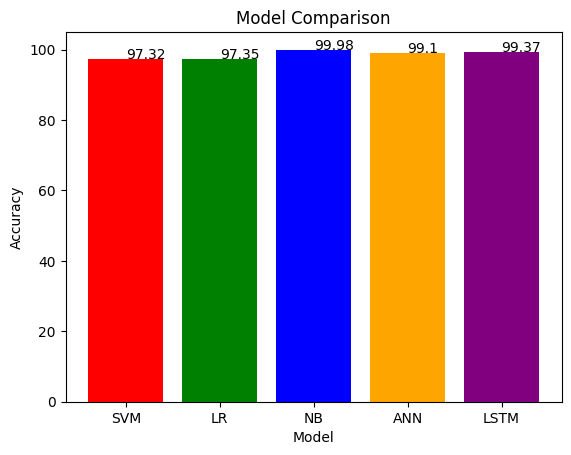

In [34]:
print("Accuracy using SVM(%): ")
print(accuracySVM)
print("Accuracy using Logistic Regression(%): ")
print(accuracyLR)
print("Accuracy using Naive Bayes(%): ")
print(accuracyNB)

import matplotlib.pyplot as plt

accuracy_vals = [accuracySVM, accuracyLR, accuracyNB, accuracyANN, accuracyLSTM]
model_labels = ['SVM', 'LR', 'NB', 'ANN', 'LSTM']
colors = ['red', 'green', 'blue', 'orange', 'purple']

fig, ax = plt.subplots()
ax.bar(model_labels, accuracy_vals, color=colors)

for i, v in enumerate(accuracy_vals):
    ax.text(i, v+0.01, str(round(v,2)))

ax.set_title('Model Comparison')
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
plt.show()


Splitting the train data into train(80%) and validation(20%)

In [35]:
train_x, val_x, train_y, val_y = train_test_split(x_train, y_train, stratify=y_train, test_size=0.2, random_state=0)

In [36]:
print(x_train.shape, x_test.shape)

(20000, 16) (4000, 16)


In [37]:
columns = ["pkSeqID", "proto", "saddr", "sport", "daddr" , "dport",
            "seq", "stddev", "N_IN_Conn_P_SrcIP", "min", "state_number",
            "mean", "N_IN_Conn_P_DstIP", "drate", "srate", "max"]

print(len(columns))

16


**Hybrid Model**

In [38]:
svm_model = SVM()
svm_model.train(train_x, train_y)

y_val_pred1 = svm_model.test(val_x)
y_val_pred1 = pd.DataFrame(y_val_pred1)

y_test_pred1 = svm_model.test(x_test)
y_test_pred1 = pd.DataFrame(y_test_pred1)

In [39]:
LR_model = LR()
LR_model.train(train_x, train_y)

y_val_pred2 = LR_model.test(val_x)
y_val_pred2 = pd.DataFrame(y_val_pred2)

y_test_pred2 = LR_model.test(x_test)
y_test_pred2 = pd.DataFrame(y_test_pred2)

In [40]:
NB_model = NaiveBayes()
NB_model.train(train_x, train_y)

y_val_pred3 = NB_model.test(val_x)
y_val_pred3 = pd.DataFrame(y_val_pred3)

y_test_pred3 = NB_model.test(x_test)
y_test_pred3 = pd.DataFrame(y_test_pred3)

<ipython-input-28-c3c7c848fc04>:20: RuntimeWarning: divide by zero encountered in log
  likelihood = np.sum(np.log(self.pdf(idx, x)))


In [41]:
# Define and train the ANN model
ann_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_dim=train_x.shape[1]),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
ann_model.fit(train_x, train_y, epochs=1, batch_size=32, validation_data=(val_x, val_y))

# Use the trained ANN model to predict the output for the validation set
y_val_pred4 = ann_model.predict(val_x)
y_val_pred4 = pd.DataFrame(y_val_pred4)

125/125 [==============================] - 0s 1ms/step


In [42]:
# Define and train the LSTM model
lstm_model = keras.Sequential([
    layers.LSTM(64, input_shape=(train_x.shape[1], 1)),
    layers.Dense(1, activation='sigmoid')
])
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.fit(train_x.reshape(train_x.shape[0], train_x.shape[1], 1), train_y, epochs=1, batch_size=32, validation_data=(val_x.reshape(val_x.shape[0], val_x.shape[1], 1), val_y))

# Use the trained LSTM model to predict the output for the validation set
y_val_pred5 = lstm_model.predict(val_x.reshape(val_x.shape[0], val_x.shape[1], 1))
y_val_pred5 = pd.DataFrame(y_val_pred5)

# Concatenate the predicted outputs from all the models
val_input = pd.concat([pd.DataFrame(val_x, columns=columns), y_val_pred1, y_val_pred2, y_val_pred3, y_val_pred4, y_val_pred5], axis=1)
test_input = pd.concat([pd.DataFrame(x_test, columns=columns), y_test_pred1, y_test_pred2, y_test_pred3, pd.DataFrame(ann_model.predict(x_test)), pd.DataFrame(lstm_model.predict(x_test.reshape(x_test.shape[0], x_test.shape[1], 1)))], axis=1)


125/125 [==============================] - 1s 5ms/step


In [43]:
# val_input = val_input.rename(columns={val_input.columns[-1]: 'LSTM'})
val_input.columns = val_input.columns.astype(str)
print(val_input)


       pkSeqID     proto     saddr     sport     daddr     dport       seq  \
0    -1.369011 -1.004729 -1.182052 -1.066255  0.611498  0.162275  0.125811   
1    -0.433382  0.858468  0.354278  0.422823  0.052261  0.162275  1.828012   
2    -1.069626  0.858468 -1.182052  0.093746  0.611498  0.162275 -0.279861   
3    -1.187036 -1.004729 -1.182052 -0.852223  0.611498  0.162275 -0.737561   
4    -0.528963  0.858468 -0.413887  0.659214  0.425085  0.162275  0.481924   
...        ...       ...       ...       ...       ...       ...       ...   
3995 -0.320404  0.858468  1.122442  0.712671 -0.320564  0.162275 -0.007104   
3996  1.587415  0.858468  2.658771 -1.214431  4.712568 -1.626996 -1.194295   
3997 -1.151834  0.858468 -1.182052 -1.648593  0.611498  0.162275 -1.437593   
3998  0.949154  0.858468  0.354278 -0.111342 -0.320564  0.162275  1.863874   
3999  0.721927  0.858468 -1.182052 -1.245936 -0.320564  0.162275 -1.336175   

        stddev  N_IN_Conn_P_SrcIP       min  ...      mean  N_I

In [44]:
test_input.columns = test_input.columns.astype(str)
print(test_input)

       pkSeqID     proto     saddr     sport     daddr     dport       seq  \
0     1.587483  0.858468  2.658771 -1.426837  2.475621 -7.389501 -1.496693   
1     1.587476  0.858468  2.658771 -1.466675  1.729971 -7.389501 -1.496784   
2     1.587410  0.858468  1.122442 -1.198983  4.153331 -7.389501 -1.254466   
3     1.587500  0.858468  2.658771 -1.259757 -2.557512 -7.389501 -1.496170   
4     1.587408  0.858468 -0.413887 -1.233131 -0.134152 -7.389501 -1.254557   
...        ...       ...       ...       ...       ...       ...       ...   
3995 -0.955613  0.858468  0.354278 -1.267075 -0.693389 -6.836932  1.325797   
3996 -0.134526 -1.004729  0.354278 -1.663227 -1.066213 -6.836932 -0.624002   
3997  0.171867 -1.004729 -1.182052 -1.237805 -1.066213 -6.836932  0.264777   
3998 -1.440975 -1.004729  0.354278 -0.991252 -0.693389 -6.836932 -0.887662   
3999 -0.043197 -1.004729  1.122442 -1.364436 -1.066213 -6.836932  0.662189   

        stddev  N_IN_Conn_P_SrcIP       min  ...      mean  N_I

In [45]:
print(len(val_y))

4000


Using the Predictions of each model and final classifying the results using Random Forest and Extra Tree Classifiers

Random Forest Classifier

In [46]:
model = RandomForestClassifier(n_estimators=200)
model.fit(val_input, val_y)

accuracy_rfc = model.score(test_input, y_test)*100
print(accuracy_rfc)

99.875


Extra Tree Classifier

In [47]:
model = ExtraTreesClassifier(n_estimators=200)
model.fit(val_input, val_y)

accuracy_etc = model.score(test_input, y_test)*100
print(accuracy_etc)

99.875


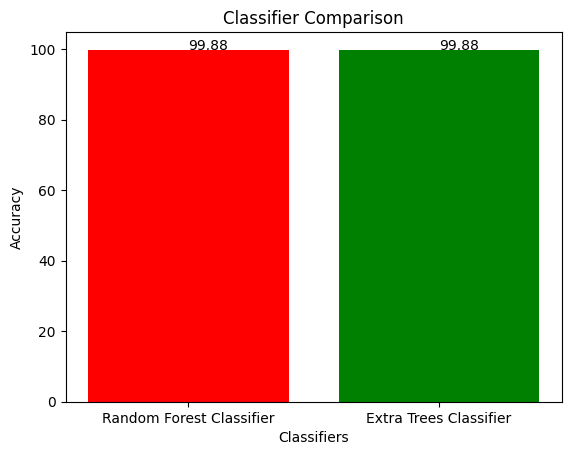

In [48]:
accuracy_v = [accuracy_rfc, accuracy_etc]
classifier_l = ['Random Forest Classifier', 'Extra Trees Classifier']
colors = ['red', 'green']

fig, ax = plt.subplots()
ax.bar(classifier_l, accuracy_v, color=colors)

for i, v in enumerate(accuracy_v):
    ax.text(i, v+0.01, str(round(v,2)))

ax.set_title('Classifier Comparison')
ax.set_xlabel('Classifiers')
ax.set_ylabel('Accuracy')
plt.show()